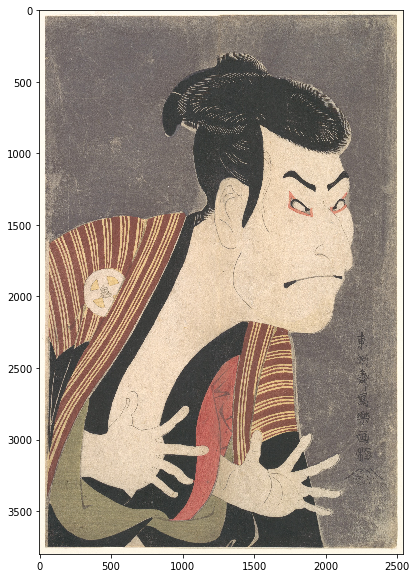

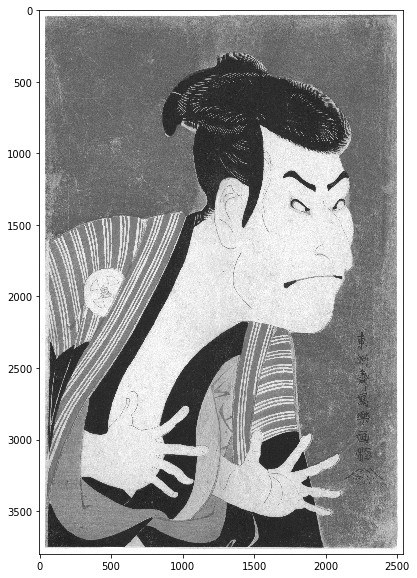

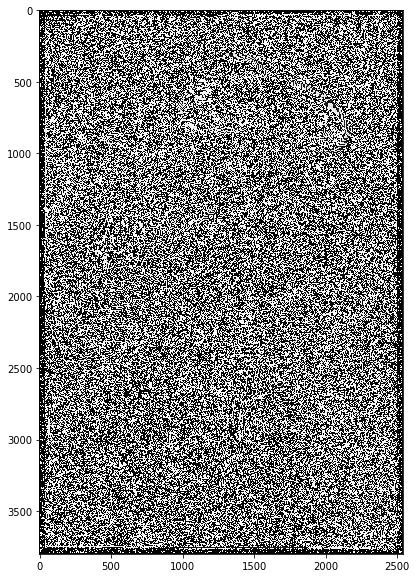

In [5]:
# Jun Hirabayashi @hirax jun@hirax.net

import numpy as np;  import cv2
from matplotlib import pyplot as plt
img = cv2.imread( 'DP130228.jpg' )  # 元画像を読み込む
                                                        # https://www.metmuseum.org/art/collection/search/60001468 からダウンロードできる
h, s, v = cv2.split( cv2.cvtColor( img, 
                    cv2.COLOR_BGR2HSV ) )
cv2.imwrite( 'roughness.png', v )         # 濃淡を粗さ画像として使う
blur = cv2.GaussianBlur( v, ( 7, 7 ), 0 )
diff = abs( v - blur );
cv2.imwrite( 'bump.png', diff )              # ガウシアン差分を凹凸画像として使う

plt.figure( figsize = ( 12, 10 ) )
plt.imshow( np.array( cv2.cvtColor( img, cv2.COLOR_BGR2RGB) ) )
plt.figure( figsize = ( 12, 10 ) )
plt.imshow( np.array( v ), cmap = 'gray' )
plt.figure( figsize = ( 12, 10 ) )
plt.imshow( np.array( diff ), cmap = 'gray' )

In [ ]:
# https WEB server for test
import sys, os, subprocess
from bottle import route, run, static_file, ServerAdapter

class SSLWebServer(ServerAdapter):
    def run(self, handler):
        from gevent.pywsgi import WSGIServer
        srv = WSGIServer( (self.host, self.port), handler,
        certfile='./server.pem', keyfile='./server.pem')
        srv.serve_forever()

@route('/<filename:path>')
def static(filename):
    return static_file(filename, root="/Users/jun/source/py35_opencv3/")

run(host='0.0.0.0', port=8080, server=SSLWebServer)

Bottle v0.13-dev server starting up (using SSLWebServer())...
Listening on http://0.0.0.0:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [2019-01-13 15:10:50] "GET / HTTP/1.1" 404 851 0.003181
127.0.0.1 - - [2019-01-13 15:10:50] "GET /favicon.ico HTTP/1.1" 404 858 0.000391
127.0.0.1 - - [2019-01-13 15:11:14] "GET / HTTP/1.1" 404 851 0.000265
127.0.0.1 - - [2019-01-13 15:11:16] "GET /DP130228.htm HTTP/1.1" 200 3352 0.009533
127.0.0.1 - - [2019-01-13 15:11:16] "GET /DP130228.jpg HTTP/1.1" 200 2707760 0.008817
127.0.0.1 - - [2019-01-13 15:11:16] "GET /bump.png HTTP/1.1" 200 5977441 0.015462
127.0.0.1 - - [2019-01-13 15:11:16] "GET /rough.png HTTP/1.1" 200 6183204 0.013303
127.0.0.1 - - [2019-01-13 15:11:17] "GET /favicon.ico HTTP/1.1" 404 858 0.000343
